# 时间序列

In [1]:
import numpy as np
import pandas as pd

## 日期和时间数据的类型及工具

In [2]:
from datetime import datetime
now = datetime.now()
now

datetime.datetime(2019, 8, 26, 11, 24, 55, 831490)

In [3]:
now.year, now.month, now.day

(2019, 8, 26)

In [4]:
delta = datetime(2011, 1, 7) - datetime(2008, 6, 24, 8, 15)
delta

datetime.timedelta(926, 56700)

In [5]:
delta.days

926

In [6]:
delta.seconds

56700

In [7]:
from datetime import timedelta
start = datetime(2011, 1, 7)
start + timedelta(12)

datetime.datetime(2011, 1, 19, 0, 0)

In [8]:
start - 2 * timedelta(12)

datetime.datetime(2010, 12, 14, 0, 0)

### 字符串与datetime互相转换

In [9]:
stamp = datetime(2011, 1, 3)
str(stamp)

'2011-01-03 00:00:00'

In [10]:
stamp.strftime('%Y-%m-%d')

'2011-01-03'

In [11]:
value = '2011-01-03'
datetime.strptime(value, '%Y-%m-%d')
datestrs = ['7/6/2011', '8/6/2011']
[datetime.strptime(x, '%m/%d/%Y') for x in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

In [12]:
from dateutil.parser import parse
parse('2011-01-03')

datetime.datetime(2011, 1, 3, 0, 0)

In [13]:
parse('Jan 31, 1997 10:45 PM')

datetime.datetime(1997, 1, 31, 22, 45)

In [14]:
parse('6/12/2011', dayfirst=True)

datetime.datetime(2011, 12, 6, 0, 0)

In [15]:
datestrs = ['2011-07-06 12:00:00', '2011-08-06 00:00:00']
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)

In [16]:
idx = pd.to_datetime(datestrs + [None])
idx

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)

In [17]:
idx[2]

NaT

In [18]:
pd.isnull(idx)

array([False, False,  True])

## 时间序列基础

In [19]:
from datetime import datetime
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5),
         datetime(2011, 1, 7), datetime(2011, 1, 8),
         datetime(2011, 1, 10), datetime(2011, 1, 12)]
ts = pd.Series(np.random.randn(6), index=dates)
ts

2011-01-02   -0.198283
2011-01-05   -0.949001
2011-01-07   -2.126789
2011-01-08   -0.682523
2011-01-10    0.394342
2011-01-12   -0.062298
dtype: float64

In [20]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [21]:
ts + ts[::2]

2011-01-02   -0.396565
2011-01-05         NaN
2011-01-07   -4.253579
2011-01-08         NaN
2011-01-10    0.788684
2011-01-12         NaN
dtype: float64

In [22]:
ts.index.dtype

dtype('<M8[ns]')

In [23]:
stamp = ts.index[0]
stamp

Timestamp('2011-01-02 00:00:00')

### 索引、选择、子集

In [24]:
stamp = ts.index[2]
ts[stamp]

-2.1267894535311886

In [25]:
ts['1/10/2011']

0.39434186576444147

In [26]:
ts['20110110']

0.39434186576444147

In [27]:
longer_ts = pd.Series(np.random.randn(1000),
                      index=pd.date_range('1/1/2000', periods=1000))
longer_ts

2000-01-01    1.082981
2000-01-02    0.120492
2000-01-03    0.997438
2000-01-04    1.319537
2000-01-05   -2.407037
2000-01-06    0.397061
2000-01-07   -0.245363
2000-01-08    0.795305
2000-01-09   -2.748020
2000-01-10   -0.909240
2000-01-11    1.614849
2000-01-12    1.745369
2000-01-13   -1.026082
2000-01-14   -2.086052
2000-01-15   -1.527574
2000-01-16   -1.830525
2000-01-17    0.073035
2000-01-18    0.049919
2000-01-19    1.780563
2000-01-20   -1.250075
2000-01-21   -2.801955
2000-01-22   -0.033360
2000-01-23   -0.509746
2000-01-24   -1.476709
2000-01-25    0.580868
2000-01-26   -0.577036
2000-01-27   -0.951055
2000-01-28    0.655501
2000-01-29    0.270696
2000-01-30   -0.825981
                ...   
2002-08-28    0.038166
2002-08-29    0.078520
2002-08-30   -0.680016
2002-08-31   -1.814608
2002-09-01    0.640652
2002-09-02   -0.097373
2002-09-03   -2.327493
2002-09-04    0.554413
2002-09-05    0.383576
2002-09-06   -1.576869
2002-09-07    1.500659
2002-09-08    0.544316
2002-09-09 

In [28]:
longer_ts['2001']

2001-01-01    0.049673
2001-01-02    0.754011
2001-01-03    2.609640
2001-01-04    1.060242
2001-01-05    0.630903
2001-01-06    0.557387
2001-01-07   -1.306790
2001-01-08    0.650375
2001-01-09    0.833154
2001-01-10   -0.705204
2001-01-11   -0.575268
2001-01-12   -1.174586
2001-01-13   -1.497917
2001-01-14    0.041983
2001-01-15   -0.132845
2001-01-16   -0.114290
2001-01-17    1.806890
2001-01-18    0.653591
2001-01-19    0.437344
2001-01-20    0.501690
2001-01-21   -1.741502
2001-01-22    0.066462
2001-01-23    0.843059
2001-01-24    0.746222
2001-01-25    1.013422
2001-01-26   -0.293566
2001-01-27   -1.729129
2001-01-28   -0.510082
2001-01-29    0.227137
2001-01-30   -0.208513
                ...   
2001-12-02    1.975214
2001-12-03   -0.721058
2001-12-04   -2.949907
2001-12-05    0.898206
2001-12-06   -0.111261
2001-12-07   -0.943243
2001-12-08    0.945877
2001-12-09    0.337692
2001-12-10    1.648441
2001-12-11    0.664004
2001-12-12    1.031294
2001-12-13   -1.292104
2001-12-14 

In [29]:
longer_ts['2001-05']

2001-05-01   -0.493670
2001-05-02    0.426448
2001-05-03    0.274009
2001-05-04   -0.527366
2001-05-05   -1.218972
2001-05-06   -0.473650
2001-05-07    0.109198
2001-05-08    0.299536
2001-05-09   -0.065278
2001-05-10    1.006154
2001-05-11   -0.750675
2001-05-12   -0.553400
2001-05-13    0.952881
2001-05-14    1.433573
2001-05-15   -1.002268
2001-05-16   -0.609981
2001-05-17    0.912678
2001-05-18    1.253035
2001-05-19   -0.335638
2001-05-20   -1.063245
2001-05-21   -1.903302
2001-05-22    1.786179
2001-05-23   -0.089049
2001-05-24   -0.577600
2001-05-25   -0.175350
2001-05-26   -1.437815
2001-05-27    0.882749
2001-05-28    0.578970
2001-05-29    0.942845
2001-05-30   -0.315138
2001-05-31    0.843197
Freq: D, dtype: float64

In [30]:
ts[datetime(2011, 1, 7):]

2011-01-07   -2.126789
2011-01-08   -0.682523
2011-01-10    0.394342
2011-01-12   -0.062298
dtype: float64

In [31]:
ts
ts['1/6/2011':'1/11/2011']

2011-01-07   -2.126789
2011-01-08   -0.682523
2011-01-10    0.394342
dtype: float64

In [32]:
ts.truncate(after='1/9/2011')

2011-01-02   -0.198283
2011-01-05   -0.949001
2011-01-07   -2.126789
2011-01-08   -0.682523
dtype: float64

In [33]:
dates = pd.date_range('1/1/2000', periods=100, freq='W-WED')
long_df = pd.DataFrame(np.random.randn(100, 4),
                       index=dates,
                       columns=['Colorado', 'Texas',
                                'New York', 'Ohio'])
long_df.loc['5-2001']

,Colorado,Texas,New York,Ohio
2001-05-02,-1.841470,-0.583074,-0.233941,0.660836
2001-05-09,-0.879728,0.756088,1.848547,-1.814492
2001-05-16,-0.547497,-0.266433,-2.501400,0.376820
2001-05-23,0.696383,-0.269833,-0.661842,1.379199
2001-05-30,-1.019966,0.129688,-2.182756,-0.435315


### 含有重复索引的时间序列

In [34]:
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000',
                          '1/2/2000', '1/3/2000'])
dup_ts = pd.Series(np.arange(5), index=dates)
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int32

In [35]:
dup_ts.index.is_unique

False

In [36]:
dup_ts['1/3/2000']  # not duplicated

4

In [37]:
dup_ts['1/2/2000']  # duplicated

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int32

In [38]:
grouped = dup_ts.groupby(level=0)
grouped.mean()

2000-01-01    0
2000-01-02    2
2000-01-03    4
dtype: int32

In [39]:
grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

## 日期范围、频率和移位

In [40]:
ts

2011-01-02   -0.198283
2011-01-05   -0.949001
2011-01-07   -2.126789
2011-01-08   -0.682523
2011-01-10    0.394342
2011-01-12   -0.062298
dtype: float64

In [41]:
resampler = ts.resample('D')

### 生成日期范围

In [42]:
index = pd.date_range('2012-04-01', '2012-06-01')
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [43]:
pd.date_range(start='2012-04-01', periods=20)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [44]:
pd.date_range(end='2012-06-01', periods=20)

DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

In [45]:
pd.date_range('2000-01-01', '2000-12-01', freq='BM')

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BM')

In [46]:
pd.date_range('2012-05-02 12:56:31', periods=5)

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

In [47]:
pd.date_range('2012-05-02 12:56:31', periods=5, normalize=True)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

### 频率和日期偏置

In [49]:
from pandas.tseries.offsets import Hour, Minute
hour = Hour()
hour

<Hour>

In [50]:
four_hours = Hour(4)
four_hours

<4 * Hours>

In [51]:
pd.date_range('2000-01-01', '2000-01-03 23:59', freq='4h')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [52]:
Hour(2) + Minute(30)

<150 * Minutes>

In [53]:
pd.date_range('2000-01-01', periods=10, freq='1h30min')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')

#### 月中某星期的日期

In [54]:
rng = pd.date_range('2012-01-01', '2012-09-01', freq='WOM-3FRI')
list(rng)

[Timestamp('2012-01-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-02-17 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-03-16 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-04-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-05-18 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-06-15 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-07-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-08-17 00:00:00', freq='WOM-3FRI')]

### 移位（前向和后向）日期

In [55]:
ts = pd.Series(np.random.randn(4),
               index=pd.date_range('1/1/2000', periods=4, freq='M'))
ts

2000-01-31   -0.408821
2000-02-29    2.645302
2000-03-31   -0.190314
2000-04-30    0.282928
Freq: M, dtype: float64

In [56]:
ts.shift(2)

2000-01-31         NaN
2000-02-29         NaN
2000-03-31   -0.408821
2000-04-30    2.645302
Freq: M, dtype: float64

In [57]:
ts.shift(-2)

2000-01-31   -0.190314
2000-02-29    0.282928
2000-03-31         NaN
2000-04-30         NaN
Freq: M, dtype: float64

In [58]:
ts / ts.shift(1) - 1

2000-01-31         NaN
2000-02-29   -7.470561
2000-03-31   -1.071944
2000-04-30   -2.486642
Freq: M, dtype: float64

In [59]:
ts.shift(2, freq='M')

2000-03-31   -0.408821
2000-04-30    2.645302
2000-05-31   -0.190314
2000-06-30    0.282928
Freq: M, dtype: float64

In [60]:
ts.shift(3, freq='D')

2000-02-03   -0.408821
2000-03-03    2.645302
2000-04-03   -0.190314
2000-05-03    0.282928
dtype: float64

In [61]:
ts.shift(1, freq='90T')

2000-01-31 01:30:00   -0.408821
2000-02-29 01:30:00    2.645302
2000-03-31 01:30:00   -0.190314
2000-04-30 01:30:00    0.282928
Freq: M, dtype: float64

#### 使用偏置进行移位日期

In [62]:
from pandas.tseries.offsets import Day, MonthEnd
now = datetime(2011, 11, 17)
now + 3 * Day()

Timestamp('2011-11-20 00:00:00')

In [63]:
now + MonthEnd()

Timestamp('2011-11-30 00:00:00')

In [64]:
now + MonthEnd(2)

Timestamp('2011-12-31 00:00:00')

In [65]:
offset = MonthEnd()
offset.rollforward(now)

Timestamp('2011-11-30 00:00:00')

In [66]:
offset.rollback(now)

Timestamp('2011-10-31 00:00:00')

In [67]:
ts = pd.Series(np.random.randn(20),
               index=pd.date_range('1/15/2000', periods=20, freq='4d'))
ts

2000-01-15   -0.481888
2000-01-19    1.057214
2000-01-23    1.526799
2000-01-27   -1.032268
2000-01-31   -0.157563
2000-02-04    1.233711
2000-02-08   -1.607425
2000-02-12    1.383176
2000-02-16    0.087453
2000-02-20   -0.498460
2000-02-24    0.191103
2000-02-28    0.307938
2000-03-03    1.269329
2000-03-07   -0.990332
2000-03-11   -0.743979
2000-03-15    0.796653
2000-03-19   -1.402539
2000-03-23    0.251284
2000-03-27    0.347520
2000-03-31   -1.110559
Freq: 4D, dtype: float64

In [68]:
ts.groupby(offset.rollforward).mean()

2000-01-31    0.182459
2000-02-29    0.156785
2000-03-31   -0.197828
dtype: float64

In [69]:
ts.resample('M').mean()

2000-01-31    0.182459
2000-02-29    0.156785
2000-03-31   -0.197828
Freq: M, dtype: float64

## 时区处理

In [70]:
import pytz
pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [71]:
tz = pytz.timezone('America/New_York')
tz

<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

### 时区的本地化和转换

In [72]:
rng = pd.date_range('3/9/2012 9:30', periods=6, freq='D')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-03-09 09:30:00    0.414763
2012-03-10 09:30:00   -1.351586
2012-03-11 09:30:00   -1.235491
2012-03-12 09:30:00    0.854436
2012-03-13 09:30:00    1.466888
2012-03-14 09:30:00   -0.738497
Freq: D, dtype: float64

In [73]:
print(ts.index.tz)

None


In [74]:
pd.date_range('3/9/2012 9:30', periods=10, freq='D', tz='UTC')

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00', '2012-03-16 09:30:00+00:00',
               '2012-03-17 09:30:00+00:00', '2012-03-18 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [75]:
ts

2012-03-09 09:30:00    0.414763
2012-03-10 09:30:00   -1.351586
2012-03-11 09:30:00   -1.235491
2012-03-12 09:30:00    0.854436
2012-03-13 09:30:00    1.466888
2012-03-14 09:30:00   -0.738497
Freq: D, dtype: float64

In [76]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-09 09:30:00+00:00    0.414763
2012-03-10 09:30:00+00:00   -1.351586
2012-03-11 09:30:00+00:00   -1.235491
2012-03-12 09:30:00+00:00    0.854436
2012-03-13 09:30:00+00:00    1.466888
2012-03-14 09:30:00+00:00   -0.738497
Freq: D, dtype: float64

In [77]:
ts_utc.index

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [78]:
ts_utc.tz_convert('America/New_York')

2012-03-09 04:30:00-05:00    0.414763
2012-03-10 04:30:00-05:00   -1.351586
2012-03-11 05:30:00-04:00   -1.235491
2012-03-12 05:30:00-04:00    0.854436
2012-03-13 05:30:00-04:00    1.466888
2012-03-14 05:30:00-04:00   -0.738497
Freq: D, dtype: float64

In [79]:
ts_eastern = ts.tz_localize('America/New_York')
ts_eastern.tz_convert('UTC')

2012-03-09 14:30:00+00:00    0.414763
2012-03-10 14:30:00+00:00   -1.351586
2012-03-11 13:30:00+00:00   -1.235491
2012-03-12 13:30:00+00:00    0.854436
2012-03-13 13:30:00+00:00    1.466888
2012-03-14 13:30:00+00:00   -0.738497
Freq: D, dtype: float64

In [80]:
ts_eastern.tz_convert('Europe/Berlin')

2012-03-09 15:30:00+01:00    0.414763
2012-03-10 15:30:00+01:00   -1.351586
2012-03-11 14:30:00+01:00   -1.235491
2012-03-12 14:30:00+01:00    0.854436
2012-03-13 14:30:00+01:00    1.466888
2012-03-14 14:30:00+01:00   -0.738497
Freq: D, dtype: float64

In [81]:
ts.index.tz_localize('Asia/Shanghai')

DatetimeIndex(['2012-03-09 09:30:00+08:00', '2012-03-10 09:30:00+08:00',
               '2012-03-11 09:30:00+08:00', '2012-03-12 09:30:00+08:00',
               '2012-03-13 09:30:00+08:00', '2012-03-14 09:30:00+08:00'],
              dtype='datetime64[ns, Asia/Shanghai]', freq='D')

### 时区感知时间戳对象的操作

In [82]:
stamp = pd.Timestamp('2011-03-12 04:00')
stamp_utc = stamp.tz_localize('utc')
stamp_utc.tz_convert('America/New_York')

Timestamp('2011-03-11 23:00:00-0500', tz='America/New_York')

In [83]:
stamp_moscow = pd.Timestamp('2011-03-12 04:00', tz='Europe/Moscow')
stamp_moscow

Timestamp('2011-03-12 04:00:00+0300', tz='Europe/Moscow')

In [84]:
stamp_utc.value

1299902400000000000

In [85]:
stamp_utc.tz_convert('America/New_York').value

1299902400000000000

In [86]:
from pandas.tseries.offsets import Hour
stamp = pd.Timestamp('2012-03-12 01:30', tz='US/Eastern')
stamp

Timestamp('2012-03-12 01:30:00-0400', tz='US/Eastern')

In [87]:
stamp + Hour()

Timestamp('2012-03-12 02:30:00-0400', tz='US/Eastern')

In [88]:
stamp = pd.Timestamp('2012-11-04 00:30', tz='US/Eastern')
stamp

Timestamp('2012-11-04 00:30:00-0400', tz='US/Eastern')

In [89]:
stamp + 2 * Hour()

Timestamp('2012-11-04 01:30:00-0500', tz='US/Eastern')

### 不同时区间的操作

In [90]:
rng = pd.date_range('3/7/2012 9:30', periods=10, freq='B')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-03-07 09:30:00    0.570358
2012-03-08 09:30:00   -1.198682
2012-03-09 09:30:00    0.003128
2012-03-12 09:30:00   -0.069228
2012-03-13 09:30:00    2.152910
2012-03-14 09:30:00   -1.182612
2012-03-15 09:30:00    0.087174
2012-03-16 09:30:00    0.244783
2012-03-19 09:30:00    0.092903
2012-03-20 09:30:00    0.080090
Freq: B, dtype: float64

In [91]:
ts1 = ts[:7].tz_localize('Europe/London')
ts2 = ts1[2:].tz_convert('Europe/Moscow')
result = ts1 + ts2
result.index

DatetimeIndex(['2012-03-07 09:30:00+00:00', '2012-03-08 09:30:00+00:00',
               '2012-03-09 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='B')

## 时间区间和区间算数

In [92]:
p = pd.Period(2007, freq='A-DEC')
p

Period('2007', 'A-DEC')

In [93]:
p + 5

Period('2012', 'A-DEC')

In [94]:
p - 2

Period('2005', 'A-DEC')

In [95]:
pd.Period('2014', freq='A-DEC') - p

<7 * YearEnds: month=12>

In [96]:
rng = pd.period_range('2000-01-01', '2000-06-30', freq='M')
rng

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]', freq='M')

In [97]:
pd.Series(np.random.randn(6), index=rng)

2000-01    2.137675
2000-02    0.310127
2000-03    0.762283
2000-04   -0.400402
2000-05   -0.569940
2000-06   -0.676864
Freq: M, dtype: float64

In [98]:
values = ['2001Q3', '2002Q2', '2003Q1']
index = pd.PeriodIndex(values, freq='Q-DEC')
index

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='period[Q-DEC]', freq='Q-DEC')

### 区间频率转换

In [99]:
p = pd.Period('2007', freq='A-DEC')
p

Period('2007', 'A-DEC')

In [100]:
p.asfreq('M', how='start')

Period('2007-01', 'M')

In [101]:
p.asfreq('M', how='end')

Period('2007-12', 'M')

In [102]:
p = pd.Period('2007', freq='A-JUN')
p

Period('2007', 'A-JUN')

In [103]:
p.asfreq('M', 'start')

Period('2006-07', 'M')

In [104]:
p.asfreq('M', 'end')

Period('2007-06', 'M')

In [105]:
p = pd.Period('Aug-2007', 'M')
p.asfreq('A-JUN')

Period('2008', 'A-JUN')

In [106]:
rng = pd.period_range('2006', '2009', freq='A-DEC')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2006   -0.183872
2007    0.661990
2008   -0.672939
2009    0.493826
Freq: A-DEC, dtype: float64

In [107]:
ts.asfreq('M', how='start')

2006-01   -0.183872
2007-01    0.661990
2008-01   -0.672939
2009-01    0.493826
Freq: M, dtype: float64

In [108]:
ts.asfreq('B', how='end')

2006-12-29   -0.183872
2007-12-31    0.661990
2008-12-31   -0.672939
2009-12-31    0.493826
Freq: B, dtype: float64

### 季度区间频率

In [109]:
p = pd.Period('2012Q4', freq='Q-JAN')
p

Period('2012Q4', 'Q-JAN')

In [110]:
p.asfreq('D', 'start')

Period('2011-11-01', 'D')

In [111]:
p.asfreq('D', 'end')

Period('2012-01-31', 'D')

In [112]:
p4pm = (p.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60
p4pm

Period('2012-01-30 16:00', 'T')

In [113]:
p4pm.to_timestamp()

Timestamp('2012-01-30 16:00:00')

In [114]:
rng = pd.period_range('2011Q3', '2012Q4', freq='Q-JAN')
ts = pd.Series(np.arange(len(rng)), index=rng)
ts

2011Q3    0
2011Q4    1
2012Q1    2
2012Q2    3
2012Q3    4
2012Q4    5
Freq: Q-JAN, dtype: int32

In [115]:
new_rng = (rng.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60
ts.index = new_rng.to_timestamp()
ts

2010-10-28 16:00:00    0
2011-01-28 16:00:00    1
2011-04-28 16:00:00    2
2011-07-28 16:00:00    3
2011-10-28 16:00:00    4
2012-01-30 16:00:00    5
dtype: int32

### 将时间戳转换为区间（以及逆转换）

In [116]:
rng = pd.date_range('2000-01-01', periods=3, freq='M')
ts = pd.Series(np.random.randn(3), index=rng)
ts

2000-01-31    1.021716
2000-02-29    0.194874
2000-03-31    1.119674
Freq: M, dtype: float64

In [117]:
pts = ts.to_period()
pts

2000-01    1.021716
2000-02    0.194874
2000-03    1.119674
Freq: M, dtype: float64

In [118]:
rng = pd.date_range('1/29/2000', periods=6, freq='D')
ts2 = pd.Series(np.random.randn(6), index=rng)
ts2

2000-01-29    0.067683
2000-01-30    1.233683
2000-01-31    1.023731
2000-02-01    0.324016
2000-02-02   -0.539811
2000-02-03    0.797325
Freq: D, dtype: float64

In [119]:
ts2.to_period('M')

2000-01    0.067683
2000-01    1.233683
2000-01    1.023731
2000-02    0.324016
2000-02   -0.539811
2000-02    0.797325
Freq: M, dtype: float64

In [120]:
pts = ts2.to_period()
pts

2000-01-29    0.067683
2000-01-30    1.233683
2000-01-31    1.023731
2000-02-01    0.324016
2000-02-02   -0.539811
2000-02-03    0.797325
Freq: D, dtype: float64

In [121]:
pts.to_timestamp(how='end')

2000-01-29 23:59:59.999999999    0.067683
2000-01-30 23:59:59.999999999    1.233683
2000-01-31 23:59:59.999999999    1.023731
2000-02-01 23:59:59.999999999    0.324016
2000-02-02 23:59:59.999999999   -0.539811
2000-02-03 23:59:59.999999999    0.797325
Freq: D, dtype: float64

### 从数组生成PeriodIndex

In [123]:
data = pd.read_csv('E:/研究生/好好学习之各类课程/书/pydata-book-2nd-edition/pydata-book-2nd-edition/examples/macrodata.csv')
data.head(5)

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [124]:
data.year

0      1959.0
1      1959.0
2      1959.0
3      1959.0
4      1960.0
5      1960.0
6      1960.0
7      1960.0
8      1961.0
9      1961.0
10     1961.0
11     1961.0
12     1962.0
13     1962.0
14     1962.0
15     1962.0
16     1963.0
17     1963.0
18     1963.0
19     1963.0
20     1964.0
21     1964.0
22     1964.0
23     1964.0
24     1965.0
25     1965.0
26     1965.0
27     1965.0
28     1966.0
29     1966.0
        ...  
173    2002.0
174    2002.0
175    2002.0
176    2003.0
177    2003.0
178    2003.0
179    2003.0
180    2004.0
181    2004.0
182    2004.0
183    2004.0
184    2005.0
185    2005.0
186    2005.0
187    2005.0
188    2006.0
189    2006.0
190    2006.0
191    2006.0
192    2007.0
193    2007.0
194    2007.0
195    2007.0
196    2008.0
197    2008.0
198    2008.0
199    2008.0
200    2009.0
201    2009.0
202    2009.0
Name: year, Length: 203, dtype: float64

In [125]:
data.quarter

0      1.0
1      2.0
2      3.0
3      4.0
4      1.0
5      2.0
6      3.0
7      4.0
8      1.0
9      2.0
10     3.0
11     4.0
12     1.0
13     2.0
14     3.0
15     4.0
16     1.0
17     2.0
18     3.0
19     4.0
20     1.0
21     2.0
22     3.0
23     4.0
24     1.0
25     2.0
26     3.0
27     4.0
28     1.0
29     2.0
      ... 
173    2.0
174    3.0
175    4.0
176    1.0
177    2.0
178    3.0
179    4.0
180    1.0
181    2.0
182    3.0
183    4.0
184    1.0
185    2.0
186    3.0
187    4.0
188    1.0
189    2.0
190    3.0
191    4.0
192    1.0
193    2.0
194    3.0
195    4.0
196    1.0
197    2.0
198    3.0
199    4.0
200    1.0
201    2.0
202    3.0
Name: quarter, Length: 203, dtype: float64

In [126]:
index = pd.PeriodIndex(year=data.year, quarter=data.quarter,
                       freq='Q-DEC')
index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203, freq='Q-DEC')

In [127]:
data.index = index
data.infl

1959Q1    0.00
1959Q2    2.34
1959Q3    2.74
1959Q4    0.27
1960Q1    2.31
1960Q2    0.14
1960Q3    2.70
1960Q4    1.21
1961Q1   -0.40
1961Q2    1.47
1961Q3    0.80
1961Q4    0.80
1962Q1    2.26
1962Q2    0.13
1962Q3    2.11
1962Q4    0.79
1963Q1    0.53
1963Q2    2.75
1963Q3    0.78
1963Q4    2.46
1964Q1    0.13
1964Q2    0.90
1964Q3    1.29
1964Q4    2.05
1965Q1    1.28
1965Q2    2.54
1965Q3    0.89
1965Q4    2.90
1966Q1    4.99
1966Q2    2.10
          ... 
2002Q2    1.56
2002Q3    2.66
2002Q4    3.08
2003Q1    1.31
2003Q2    1.09
2003Q3    2.60
2003Q4    3.02
2004Q1    2.35
2004Q2    3.61
2004Q3    3.58
2004Q4    2.09
2005Q1    4.15
2005Q2    1.85
2005Q3    9.14
2005Q4    0.40
2006Q1    2.60
2006Q2    3.97
2006Q3   -1.58
2006Q4    3.30
2007Q1    4.58
2007Q2    2.75
2007Q3    3.45
2007Q4    6.38
2008Q1    2.82
2008Q2    8.53
2008Q3   -3.16
2008Q4   -8.79
2009Q1    0.94
2009Q2    3.37
2009Q3    3.56
Freq: Q-DEC, Name: infl, Length: 203, dtype: float64

## 重新采样与频率转换

In [128]:
rng = pd.date_range('2000-01-01', periods=100, freq='D')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2000-01-01    1.453977
2000-01-02    0.154258
2000-01-03    0.411176
2000-01-04    1.363851
2000-01-05    0.847030
2000-01-06    0.202372
2000-01-07    0.793903
2000-01-08   -1.004291
2000-01-09   -0.989999
2000-01-10   -0.392227
2000-01-11    0.049695
2000-01-12   -0.178819
2000-01-13   -1.077297
2000-01-14   -0.144378
2000-01-15   -1.571855
2000-01-16   -0.547951
2000-01-17   -0.615860
2000-01-18    1.570178
2000-01-19   -1.189334
2000-01-20   -1.000368
2000-01-21   -0.937689
2000-01-22   -0.776762
2000-01-23   -0.313440
2000-01-24   -1.193238
2000-01-25   -0.141424
2000-01-26    0.461511
2000-01-27    1.149509
2000-01-28    2.671219
2000-01-29   -1.116712
2000-01-30   -0.954986
                ...   
2000-03-11    1.187239
2000-03-12   -0.753586
2000-03-13   -1.003968
2000-03-14    0.704158
2000-03-15   -0.219431
2000-03-16    0.606729
2000-03-17   -1.082828
2000-03-18    0.439105
2000-03-19   -1.105481
2000-03-20   -1.154378
2000-03-21    0.055270
2000-03-22    0.233661
2000-03-23 

In [129]:
ts.resample('M').mean()

2000-01-31   -0.175420
2000-02-29   -0.003224
2000-03-31    0.093619
2000-04-30    0.273067
Freq: M, dtype: float64

In [130]:
ts.resample('M', kind='period').mean()

2000-01   -0.175420
2000-02   -0.003224
2000-03    0.093619
2000-04    0.273067
Freq: M, dtype: float64

### 向下采样

In [131]:
rng = pd.date_range('2000-01-01', periods=12, freq='T')
ts = pd.Series(np.arange(12), index=rng)
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int32

In [132]:
ts.resample('5min', closed='right').sum()

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int32

In [133]:
ts.resample('5min', closed='right').sum()

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int32

In [134]:
ts.resample('5min', closed='right', label='right').sum()

2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5T, dtype: int32

In [135]:
ts.resample('5min', closed='right',
            label='right', loffset='-1s').sum()

1999-12-31 23:59:59     0
2000-01-01 00:04:59    15
2000-01-01 00:09:59    40
2000-01-01 00:14:59    11
Freq: 5T, dtype: int32

#### 开端-峰值-谷值-结束(OHLC) 重新采样

In [136]:
ts.resample('5min').ohlc()

,open,high,low,close
2000-01-01 00:00:00,0,4,0,4
2000-01-01 00:05:00,5,9,5,9
2000-01-01 00:10:00,10,11,10,11


### 向上采样与插值

In [137]:
frame = pd.DataFrame(np.random.randn(2, 4),
                     index=pd.date_range('1/1/2000', periods=2,
                                         freq='W-WED'),
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame

,Colorado,Texas,New York,Ohio
2000-01-05,1.847487,-0.909898,-0.527805,0.089755
2000-01-12,-0.249500,-0.791566,0.792643,-1.126647


In [138]:
df_daily = frame.resample('D').asfreq()
df_daily

,Colorado,Texas,New York,Ohio
2000-01-05,1.847487,-0.909898,-0.527805,0.089755
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-0.249500,-0.791566,0.792643,-1.126647


In [139]:
frame.resample('D').ffill()

,Colorado,Texas,New York,Ohio
2000-01-05,1.847487,-0.909898,-0.527805,0.089755
2000-01-06,1.847487,-0.909898,-0.527805,0.089755
2000-01-07,1.847487,-0.909898,-0.527805,0.089755
2000-01-08,1.847487,-0.909898,-0.527805,0.089755
2000-01-09,1.847487,-0.909898,-0.527805,0.089755
2000-01-10,1.847487,-0.909898,-0.527805,0.089755
2000-01-11,1.847487,-0.909898,-0.527805,0.089755
2000-01-12,-0.249500,-0.791566,0.792643,-1.126647


In [140]:
frame.resample('D').ffill(limit=2)

,Colorado,Texas,New York,Ohio
2000-01-05,1.847487,-0.909898,-0.527805,0.089755
2000-01-06,1.847487,-0.909898,-0.527805,0.089755
2000-01-07,1.847487,-0.909898,-0.527805,0.089755
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-0.249500,-0.791566,0.792643,-1.126647


In [141]:
frame.resample('W-THU').ffill()

,Colorado,Texas,New York,Ohio
2000-01-06,1.847487,-0.909898,-0.527805,0.089755
2000-01-13,-0.249500,-0.791566,0.792643,-1.126647


### 使用区间进行重新采样

In [142]:
frame = pd.DataFrame(np.random.randn(24, 4),
                     index=pd.period_range('1-2000', '12-2001',
                                           freq='M'),
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame[:5]

,Colorado,Texas,New York,Ohio
2000-01,1.166701,0.508705,-0.697023,0.560710
2000-02,1.841695,0.404506,-1.427583,0.668156
2000-03,0.683019,-0.578964,-0.665347,-0.928671
2000-04,0.529249,-1.841236,-0.391925,2.352067
2000-05,0.165308,0.444062,-1.548463,-0.596653


In [143]:
annual_frame = frame.resample('A-DEC').mean()
annual_frame

,Colorado,Texas,New York,Ohio
2000,0.53043,0.281187,-0.391577,-0.057700
2001,0.42637,0.449552,0.161471,-0.246904


In [145]:
# Q-DEC: 每季度，年末在12月
annual_frame.resample('Q-DEC').ffill()

,Colorado,Texas,New York,Ohio
2000Q1,0.53043,0.281187,-0.391577,-0.057700
2000Q2,0.53043,0.281187,-0.391577,-0.057700
2000Q3,0.53043,0.281187,-0.391577,-0.057700
2000Q4,0.53043,0.281187,-0.391577,-0.057700
2001Q1,0.42637,0.449552,0.161471,-0.246904
2001Q2,0.42637,0.449552,0.161471,-0.246904
2001Q3,0.42637,0.449552,0.161471,-0.246904
2001Q4,0.42637,0.449552,0.161471,-0.246904


In [146]:
annual_frame.resample('Q-DEC', convention='end').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,0.53043,0.281187,-0.391577,-0.057700
2001Q1,0.53043,0.281187,-0.391577,-0.057700
2001Q2,0.53043,0.281187,-0.391577,-0.057700
2001Q3,0.53043,0.281187,-0.391577,-0.057700
2001Q4,0.42637,0.449552,0.161471,-0.246904


In [147]:
annual_frame.resample('Q-MAR').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,0.53043,0.281187,-0.391577,-0.057700
2001Q1,0.53043,0.281187,-0.391577,-0.057700
2001Q2,0.53043,0.281187,-0.391577,-0.057700
2001Q3,0.53043,0.281187,-0.391577,-0.057700
2001Q4,0.42637,0.449552,0.161471,-0.246904
2002Q1,0.42637,0.449552,0.161471,-0.246904
2002Q2,0.42637,0.449552,0.161471,-0.246904
2002Q3,0.42637,0.449552,0.161471,-0.246904


## 移动窗口函数

In [149]:
close_px_all = pd.read_csv('E:/研究生/好好学习之各类课程/书/pydata-book-2nd-edition/pydata-book-2nd-edition/examples/stock_px_2.csv',
                           parse_dates=True, index_col=0)
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]
close_px = close_px.resample('B').ffill()

In [150]:
import matplotlib.pyplot as plt
close_px.AAPL.plot()

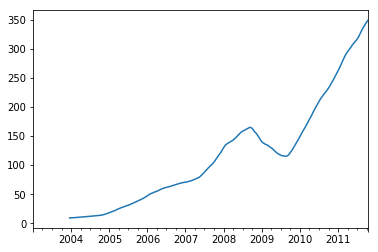

In [151]:
close_px.AAPL.rolling(250).mean().plot()

In [152]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [153]:
appl_std250 = close_px.AAPL.rolling(250, min_periods=10).std()
appl_std250[5:12]

2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15    0.077496
2003-01-16    0.074760
2003-01-17    0.112368
Freq: B, Name: AAPL, dtype: float64

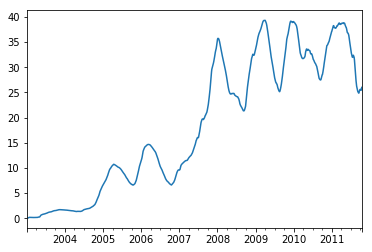

In [154]:
appl_std250.plot()

In [155]:
expanding_mean = appl_std250.expanding().mean()

In [156]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

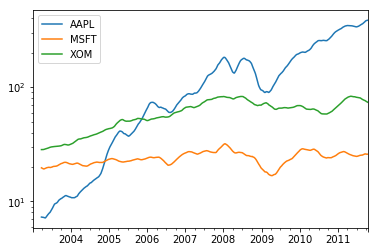

In [157]:
close_px.rolling(60).mean().plot(logy=True)

In [158]:
close_px.rolling('20D').mean()

,AAPL,MSFT,XOM
2003-01-02,7.400000,21.110000,29.220000
2003-01-03,7.425000,21.125000,29.230000
2003-01-06,7.433333,21.256667,29.473333
2003-01-07,7.432500,21.425000,29.342500
2003-01-08,7.402000,21.402000,29.240000
2003-01-09,7.391667,21.490000,29.273333
2003-01-10,7.387143,21.558571,29.238571
2003-01-13,7.378750,21.633750,29.197500
2003-01-14,7.370000,21.717778,29.194444
2003-01-15,7.355000,21.757000,29.152000


### 指数加权函数

In [159]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

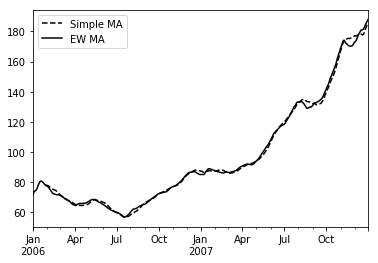

In [164]:
aapl_px = close_px.AAPL['2006':'2007']
ma60 = aapl_px.rolling(30, min_periods=20).mean()
ewma60 = aapl_px.ewm(span=30).mean()
ma60.plot(style='k--', label='Simple MA')
ewma60.plot(style='k-', label='EW MA')
plt.legend()

### 二元移动窗口函数

In [165]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [166]:
spx_px = close_px_all['SPX']
spx_rets = spx_px.pct_change()
returns = close_px.pct_change()

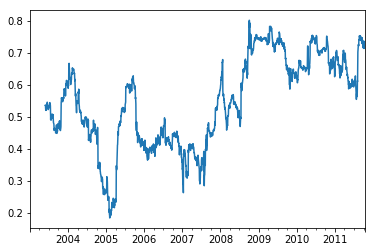

In [167]:
corr = returns.AAPL.rolling(125, min_periods=100).corr(spx_rets)
corr.plot()

In [168]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

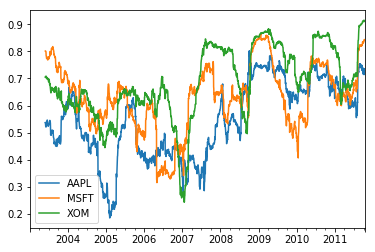

In [169]:
corr = returns.rolling(125, min_periods=100).corr(spx_rets)
corr.plot()

### 用户自定义的移动窗口函数

In [170]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

d:\anaconda3\envs\py35\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  This is separate from the ipykernel package so we can avoid doing imports until


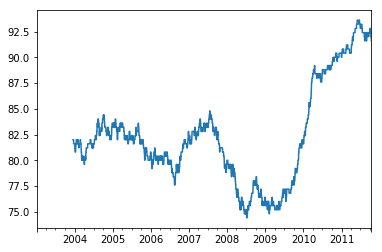

In [171]:
from scipy.stats import percentileofscore
score_at_2percent = lambda x: percentileofscore(x, 0.02)
result = returns.AAPL.rolling(250).apply(score_at_2percent)
result.plot()